In [36]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# fcm-E0.5

2022/10/20作成

fcm-eでは正則化パラメーターが10でも→+∞くらいの効果がある。  
0.1だと正則化が強すぎるので  
0.5から1くらいで調整する必要がありそう（lambdaと正則化の強さは反比例する。）

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import math
#sysはコマンドライン引数
import sys
import csv
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み
iris = pd.read_csv("../../dataset/iris-dataset.csv")
df = iris.drop('species', axis=1)
#dfをnumpyで扱えるnp.ndarray変換
X = df.values
#配列の行数、列数の格納
X_size,dimension = X.shape

#クラスタ数宣言
c = 3
#Kはクラスタサイズ 
K = X_size /c
#交互最適化最大繰り返し数
max_iter = 100

#正則化パラメーター設定
lam = 0.5
lam_1= 1/lam

#ファジィパラメーター設定
m = 1

#初期値繰り返し回数
NumberOfRepetitions= 50

In [38]:
#uの最適化部分関数作成(fcm-e)
def u_optimize(d,c,lam):
    u = np.zeros((X_size,c))
    u_denominator = np.zeros((X_size,1))
    for i in range(X_size):
        #分母作成
        for j in range(c):
            u_denominator[i] += math.exp(-lam*d[i][j])
        #u[i]を計算
        for j in range(c):
            # if i <10:
            #     print(f"e**-lam*d_k{j}",math.exp(-lam*d[i][j]))
            u[i][j] = math.exp(-lam*d[i][j])/u_denominator[i]
        # print("i",i)
        # print("np.sumu[i]",np.sum(u[i]))
    return u

In [39]:
#クラスタ中心計算部分関数作成
def v_calculation(u,c,dimension,X):
    #分母計算
    v_denominator = np.sum(u,axis=0)  
    #分子計算
    v_numerator = np.zeros((c,dimension))
    for j in range(c):
        for i in range(X_size):
            v_numerator[j]+= u[i][j]*X[i]
   
    v = np.zeros((c,dimension ))
    for i in range(c):
        v[i] = v_numerator[i]/v_denominator[i]
    return v

In [40]:
for s in range (NumberOfRepetitions):
    centroids = X[np.random.choice(X_size,c)]
    for epoch in range(max_iter):
        #print(f"{epoch+1}回目")
        #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
        d = np.zeros((X_size,c))
        for i in range(X_size):
            d[i] = np.sum((X[i]-centroids)**2,axis=1)
        #uの更新
        u = u_optimize(d,c,lam)
        #Jの計算
        #目的関数の計算
        J=0
        for i in range(X_size):
            for j in range(c):
                J += u[i][j]*d[i][j]+lam_1*u[i][j]*math.log(u[i][j])

        #vの更新
        new_centroids = v_calculation(u,c,dimension,X)

        # もしも重心が変わっていなかったら終了
        # if np.sum(np.abs(new_centroids-centroids))<=0.000001:
        if np.abs(new_centroids - centroids).max() <= 1e-7:
            #print(new_centroids-centroids)
            print("中心が変わらないのでbreakします！")
            break
        centroids = np.copy(new_centroids)

    #目的関数が小さくなっている時、cluster,best_J,best_centoridsの更新を行う
    if s == 0:
        np_cluster = np.argmax(u,axis=1)
        #最適な目的関数の更新
        best_J = J
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
        best_u = np.copy(u)
    elif best_J > J:
        np_cluster = np.argmax(u,axis=1)
        #最適な目的関数の更新
        best_J = J
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
        best_u = np.copy(u)
    print(f"{s+1}回目のクラスタリング結果↓")
    print(best_J)
    print(best_centroids)
    print("終了")
print(np_cluster)
print(best_J)
print(best_centroids)

中心が変わらないのでbreakします！
1回目のクラスタリング結果↓
10.716422103325193
[[5.01352883 3.38092855 1.53830182 0.27598126]
 [6.47974668 2.94578575 5.19918765 1.80505003]
 [6.08623277 2.81662152 4.6694346  1.5694208 ]]
終了
中心が変わらないのでbreakします！
2回目のクラスタリング結果↓
10.716422103323223
[[6.08623281 2.81662153 4.66943465 1.56942082]
 [6.47974664 2.94578574 5.1991876  1.80505001]
 [5.01352883 3.38092855 1.53830182 0.27598126]]
終了
中心が変わらないのでbreakします！
3回目のクラスタリング結果↓
10.716422103323223
[[6.08623281 2.81662153 4.66943465 1.56942082]
 [6.47974664 2.94578574 5.1991876  1.80505001]
 [5.01352883 3.38092855 1.53830182 0.27598126]]
終了
中心が変わらないのでbreakします！
4回目のクラスタリング結果↓
10.716422103323223
[[6.08623281 2.81662153 4.66943465 1.56942082]
 [6.47974664 2.94578574 5.1991876  1.80505001]
 [5.01352883 3.38092855 1.53830182 0.27598126]]
終了
中心が変わらないのでbreakします！
5回目のクラスタリング結果↓
10.716422103323223
[[6.08623281 2.81662153 4.66943465 1.56942082]
 [6.47974664 2.94578574 5.1991876  1.80505001]
 [5.01352883 3.38092855 1.53830182 0.27598126]]
終了
中心が変わ

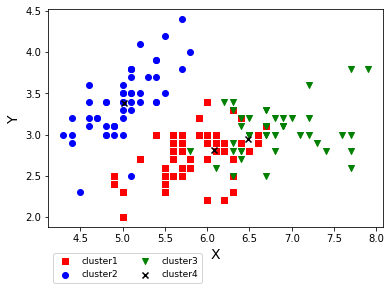

In [41]:
#matplotlibに描写

colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(c):
    ax.scatter(X[:, 0][np_cluster==i], X[:, 1][np_cluster==i], color=colors[i],marker=markers[i])
ax.scatter(best_centroids[:,0],best_centroids[:,1],color="black",marker="x")
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2','cluster3','cluster4','cluster5',"center"],fontsize=9,ncol=2,bbox_to_anchor=(0, -0.1), loc='upper left')  # 凡例を表示

plt.show()

In [42]:
print("クラスター個数",np.bincount(np_cluster))

クラスター個数 [55 51 44]


In [43]:
print(np.sum(best_u,axis=1))
print(np.sum(best_u,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[49.19269361 51.90496975 48.90233663]


In [44]:
best_u

array([[9.30479865e-04, 9.99000984e-01, 6.85357506e-05],
       [9.95507921e-04, 9.98940955e-01, 6.35370535e-05],
       [5.24917972e-04, 9.99444945e-01, 3.01374003e-05],
       [9.32803231e-04, 9.99010688e-01, 5.65091181e-05],
       [7.90093842e-04, 9.99153229e-01, 5.66771899e-05],
       [3.38483738e-03, 9.96252132e-01, 3.63030868e-04],
       [6.55518681e-04, 9.99304398e-01, 4.00837661e-05],
       [1.20915182e-03, 9.98701723e-01, 8.91247426e-05],
       [6.16305644e-04, 9.99351800e-01, 3.18946985e-05],
       [1.13053333e-03, 9.98794192e-01, 7.52746746e-05],
       [1.56721240e-03, 9.98292236e-01, 1.40551109e-04],
       [1.33423707e-03, 9.98569916e-01, 9.58466978e-05],
       [7.85927826e-04, 9.99166970e-01, 4.71022524e-05],
       [1.79795336e-04, 9.99812654e-01, 7.55033666e-06],
       [7.95000900e-04, 9.99130997e-01, 7.40018118e-05],
       [1.88586276e-03, 9.97895754e-01, 2.18383589e-04],
       [9.70011771e-04, 9.98945819e-01, 8.41695906e-05],
       [1.05881390e-03, 9.98861

##　正解とのクラスター番号を合わせる作業セル

In [45]:
#正解リスト作成
dff = pd.read_csv("../../dataset/iris-dataset.csv")
size_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
seikai = iris["species"].map(size_mapping).values
seikai

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
np_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0])

上記の二つのリストを比較してnp_clusterの番号を変更していく

In [47]:
cluster_hensyuu = np_cluster
cluster_hensyuu_0 = np.where(cluster_hensyuu==1, 100, cluster_hensyuu)
cluster_hensyuu_1 = np.where(cluster_hensyuu_0==0, 1, cluster_hensyuu_0)
cluster_hensyuu_2 = np.where(cluster_hensyuu_1==100, 0, cluster_hensyuu_1)
cluster_hensyuu_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1])

In [49]:
#------正解率の算出
dff = pd.read_csv("../../dataset/iris-dataset.csv")
size_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
seikai = iris["species"].map(size_mapping).values

seikaisuu = np.count_nonzero(cluster_hensyuu_2==seikai)
seikairitu= (np.count_nonzero(cluster_hensyuu_2==seikai))/X_size*100
print("正解率")
print(seikairitu)
print("正解数")
print(seikaisuu)
print("クラスタサイズ確認")
print(np.count_nonzero(cluster_hensyuu_2==0))
print(np.count_nonzero(cluster_hensyuu_2==1))
print(np.count_nonzero(cluster_hensyuu_2==2))

正解率
88.66666666666667
正解数
133
クラスタサイズ確認
51
55
44


In [50]:
#引数(クラスタ数(c),クラスター(cluster),データセット(X),クラスター中心(v)、\
#ファジィ化パラム(m)、帰属度(u))

def calc_F(c,cluster,X,v,m,u):
    #中心間距離の作成
    center_distance = np.zeros((c,c))
    for i in range(c):
        for j in range(c):
            center_distance[i][j]= np.sum((v[i]-v[j])**2)
    print("center_distance")
    print(center_distance)
    #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
    d_list=[]
    for i in range(X_size):
        for j in range(c):
            d_list.append(np.sum((X[i]-v[j])**2))
    d = np.array(d_list)
    d = d.reshape([X_size,c])
    print("d_{ki}")
    print(d[0])

    new_d = np.zeros((X_size,c))
    #ここが怪しい
    for i in range(c):
        new_d[cluster == i] = d[cluster == i]+center_distance[i]
    print("new_d{ki} = d_{ki}+d_{ii*}")
    print(new_d[0])

    #評価関数計算(ついでにJも再計算してあってるか確認)
    F = 0
    kakunin_J = 0
    u_m = u**m
    for i in range(X_size):
        F += np.sum(u[i] * new_d[i])
        kakunin_J += np.sum(u_m[i] * d[i])


    #この初期値のときの結果が優れている場合，bestを更新
    print("Jの値:",J)
    print("Jの値を再計算:",kakunin_J)
    print("Fの値:",F)
    return F

In [51]:
best_centroids

array([[6.08623282, 2.81662154, 4.66943467, 1.56942083],
       [5.01352883, 3.38092855, 1.53830182, 0.27598126],
       [6.47974663, 2.94578573, 5.19918759, 1.80505   ]])

In [52]:
F = calc_F(c,np_cluster,X,best_centroids,1,best_u)
F

center_distance
[[ 0.         12.94611507  0.50769577]
 [12.94611507  0.         18.0792797 ]
 [ 0.50769577 18.0792797   0.        ]]
d_{ki}
[14.00417776  0.04655582 19.22086605]
new_d{ki} = d_{ki}+d_{ii*}
[26.95029283  0.04655582 37.30014574]
Jの値: 10.716422103323355
Jの値を再計算: 146.3750340959785
Fの値: 190.99384251425923


190.99384251425923

In [53]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
#pandasで分割結果を記入
df["cluster"]= np_cluster
df["u1"]=best_u[:,0]
df["u2"]=best_u[:,1]
df["u3"]=best_u[:,2]
df["J"] = best_J
df["F"] = F
df.to_csv('Iris-fcm-E0.5.csv',index = False)

In [55]:
print(np.sum(best_u,axis=1))
print(np.sum(best_u,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[49.19269361 51.90496975 48.90233663]


In [61]:
best_u[0][0]

0.0009304798654943737

In [64]:
math.log(best_u[0][0])

-6.979810120488597

In [66]:
lam_1*best_u[0][0]*math.log(best_u[0][0])

-0.012989145564176996